# Linear Constrains

パス集合からlinear_constraintsで制約されたパス集合を求める例

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
from graphillion import GraphSet

%matplotlib inline

In [57]:
def create_metric_table_from_linear_constraints(edgelist, linear_constraints):
    """
    linear_constraintsからキーがエッジ，値がコストの辞書を作る
    linear_constraintsに記述されていないエッジのコストは0とする

    arguments:
    * edgelist(list)
    * linear_constraints(list)

    returns:
    * metric_table(dict)
    """
    edges = linear_constraints[0][0]
    no_constraint_edges = set(edgelist) - set(edges)
    metric_table = {}
    for edge in edgelist:
        if len(edge) == 3:
            edge = (edge[0], edge[1])
            cost = edge[2]
        else:
            cost = 1.0

        if edge  in no_constraint_edges:
            metric_table[edge] = 0
        else:
            metric_table[edge] = cost

    return metric_table

def draw(G, subgraph=None, metric_table=None):
    """
    Gを描画する
    subgraphを指定すると，その部分を赤色で表示する
    metric_tableを指定すると，辺にラベルを付けて表示する
    
    arguments:
    * G(networkx graph)
    * subgraph(edgelist)
    * metric_table(dict)
      辺に描画するラベル
    """
    nx.draw_networkx_nodes(G, pos, node_color="w")
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    if metric_table is not None:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=metric_table)
    if subgraph is not None:
        subgraph_obj = nx.Graph(data=subgraph)
        nx.draw_networkx_nodes(subgraph_obj, pos, node_color="r")
        nx.draw_networkx_labels(subgraph_obj, pos)
        nx.draw_networkx_edges(subgraph_obj, pos, edgelist=subgraph, edge_color="r", width=3.0)
    plt.xticks([])
    plt.yticks([])

def total_cost(metric_table, subgraph):
    """
    subgraphの辺重みの和を返す
    
    arguments:
    * metric_table(dict)
    * subgraph(edgelist)
    
    returns:
    * cost(int or float)
    """
    return sum([metric_table[edge] for edge in subgraph])

In [11]:
# トポロジを設定
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
edgelist = [(1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 8), (7, 11), (8, 12), (9, 10), (9, 13), (10, 14), (10, 11), (11, 12), (11, 15), (12, 16), (13, 14), (14, 15), (15, 16)]
G = nx.Graph(data=edgelist)
GraphSet.set_universe(edgelist)

pos = {1:(1, 10), 2:(4, 10), 3: (7, 10), 4:(10, 10), 5:(1, 7), 6:(4, 7), 7:(7, 7), 8:(10, 7), 9:(1, 4), 10:(4, 4), 11:(7, 4), 12:(10, 4), 13:(1, 1), 14:(4, 1), 15:(7, 1), 16:(10, 1)}

# コスト
alc1 = [([(1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 8), (7, 11), (8, 12), (9, 10), (9, 13), (10, 14), (10, 11), (11, 12), (11, 15), (12, 16), (13, 14), (14, 15), (15, 16)],(6.0, 10.0))]
metric_table1 = create_metric_table_from_linear_constraints(edgelist, lc1)

lc2 = [([(1, 2), (1, 5), (2, 3), (2, 6), (3, 4), (3, 7), (4, 8), (5, 6), (5, 9), (6, 7, 3.0), (6, 10, 3.0), (7, 8), (7, 11,3.0), (8, 12), (9, 10), (9, 13), (10, 14), (10, 11, 3.0), (11, 12), (11, 15), (12, 16), (13, 14), (14, 15), (15, 16)],(6.0, 10.0))]
metric_table2 = create_metric_table_from_linear_constraints(edgelist, lc2)

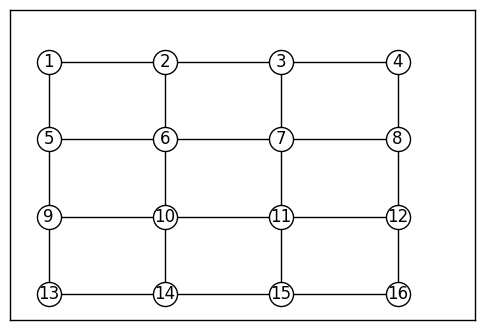

In [48]:
draw(G)

In [18]:
# パスの端点とdegree_constraintsの設定
start, goal = 1, 16
zero_or_two = range(0, 3, 2)
dc = {}
for v in nodes:
    dc[v] = zero_or_two
dc[start] = 1
dc[goal] = 1

In [31]:
paths = GraphSet.paths(start, goal)

104


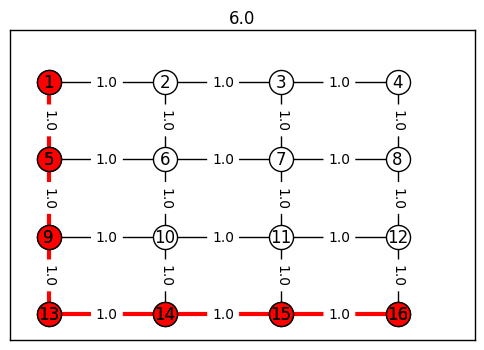

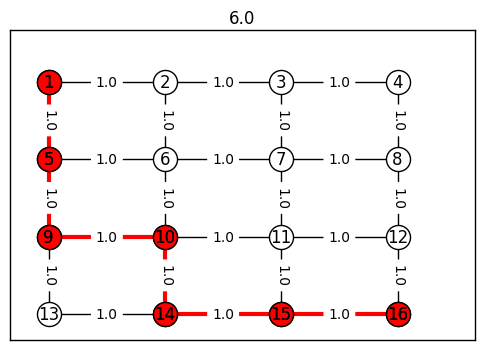

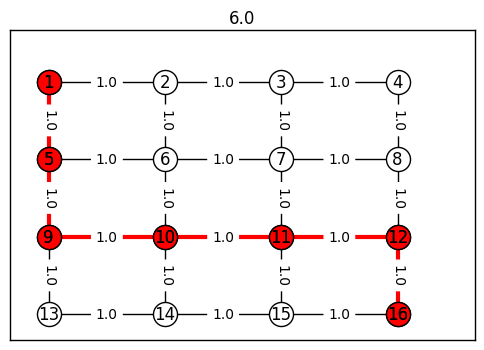

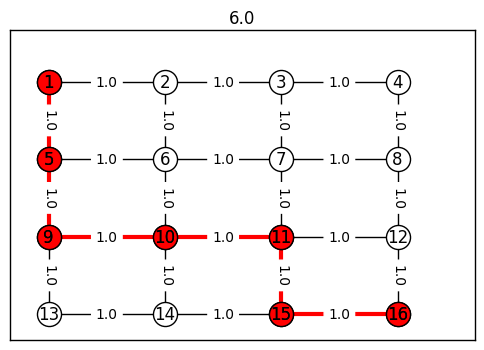

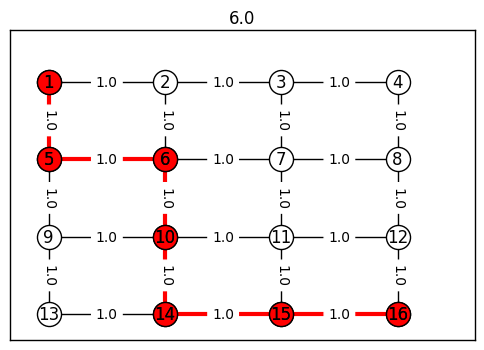

In [55]:
# lc1によるパスマッチング
pathsA = GraphSet.graphs(vertex_groups=[[start, goal]], degree_constraints=dc, no_loop=True, linear_constraints=lc1)
print(len(pathsA))

# コスト昇順で取り出す
# lc1の重みの制約である6.0以上10.0以下の範囲のパスを取り出せていることが確認できる
for i, path in enumerate(pathsA.min_iter(metric_table1)):
    plt.figure(figsize=(6, 4))
    draw(G, subgraph=path, metric_table=metric_table1)
    cost = total_cost(metric_table1, path)
    plt.title(cost)
    if i == 4:
        break

48


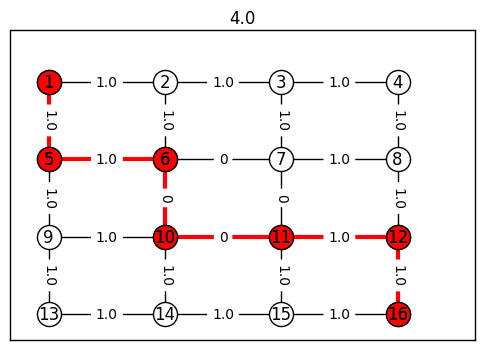

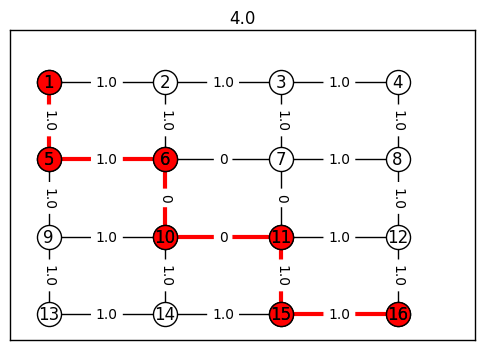

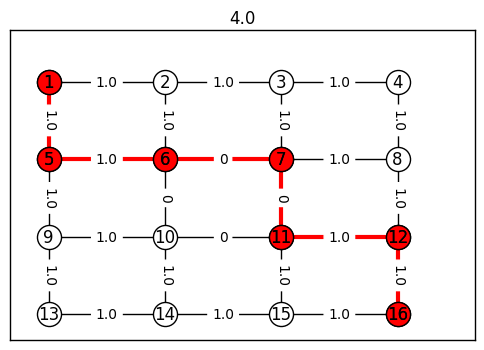

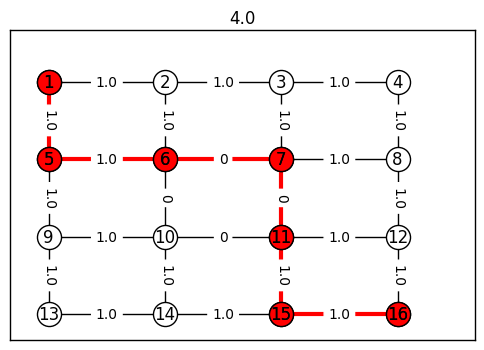

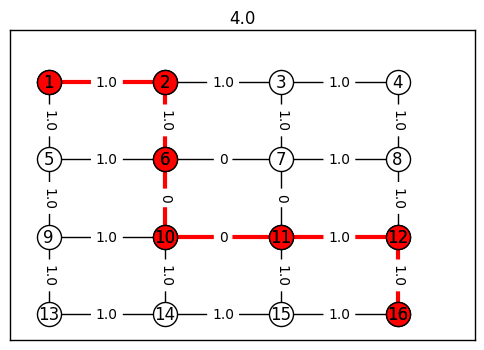

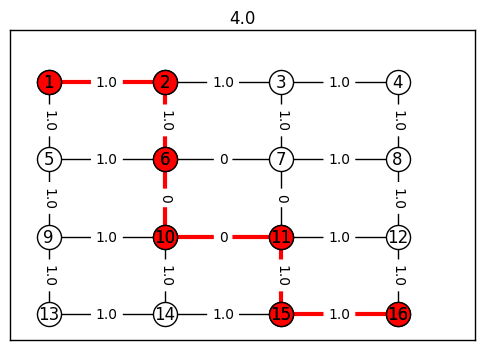

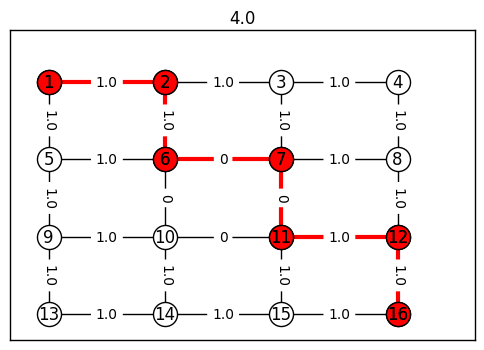

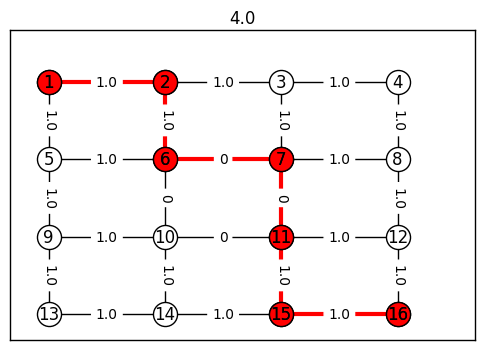

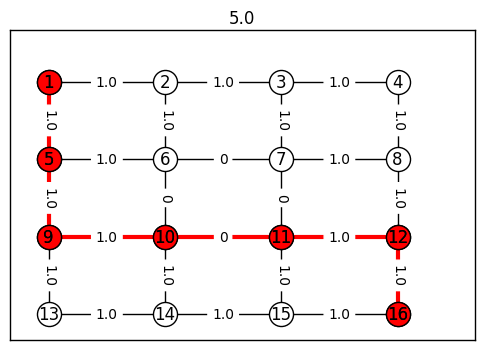

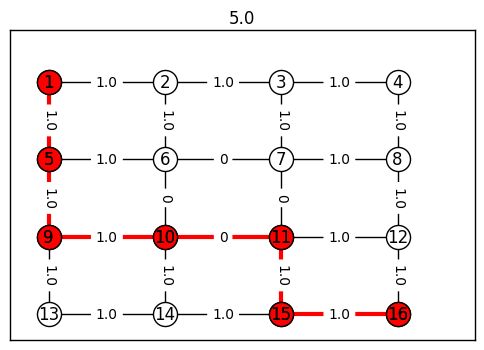

In [56]:
# lc2によるパスマッチング
pathsB = GraphSet.graphs(vertex_groups=[[start, goal]], degree_constraints=dc, no_loop=True, linear_constraints=lc2)
print(len(pathsB))

# コスト昇順で取り出す
# lc2の重みの制約である6.0以上10.0以下の範囲のパスを取り出せていることが確認できる
for i, path in enumerate(pathsA.min_iter(metric_table2)):
    plt.figure(figsize=(6, 4))
    draw(G, subgraph=path, metric_table=metric_table2)
    cost = total_cost(metric_table2, path)
    plt.title(cost)
    if i == 9:
        break